In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
class Kmeans():
    cluster_centers_ = []
    labels_ = []

    def __init__(self, k, iters=100):
        self.k = k
        self.iters = iters

    def fit(self, X):
        ##随机获取K个初始化质心
        C = []
        for i in range(self.k):
            n = random.choices(list(range(X.shape[0])))
            c = np.array(X.iloc[n, :])[0]
            C.append(c)
        C = np.array(C)
        iters = self.iters  ###迭代次数
        temp_labels = np.zeros_like(X.shape[0])
        while iters > 0:
            ###计算每个样本到每个聚类中心的距离
            A = []
            for c in C:  ##聚类中心
                # print(c)
                # print(X-c)
                # print(np.sum((X-c)**2,axis=1))
                a = np.sqrt(np.sum((X - c) ** 2, axis=1))
                # print(a)
                A.append(a)
            A = np.array(A)
            ###将样本分配的所属的聚类中心（获取最小值的下标）
            minidx = np.argmin(A, axis=0)

            ###获取每个簇的样本
            for i in range(len(C)):
                a = X[minidx == i]  ###每个簇的样本
                # print('a',a)
                C[i] = np.mean(a, axis=0)  ###更新我们的聚类中心
            if sum(temp_labels == minidx) == len(minidx):
                # 提前终止循环
                print(f"提前终止循环，iters{iters}")
                break
            temp_labels = minidx
            iters -= 1
        # print(C)
        self.cluster_centers_ = C
        # print(self.cluster_centers_)
        self.labels_ = minidx

    def predict(self, x):
        ###获取训练后的聚类中心
        ###计算待测样本与聚类中心的距离
        ###归到距离最近的那个簇

        pass

    def sse(self, x):
        """
        评估指标
        :param x:
        :return:
        """
        pass

In [10]:
# 获取数据
datas = pd.read_csv('../datas/iris.data', header=None, names=['X1', 'X2', 'X3', 'X4', 'Y'])

# 获取特征属性X
X = datas.iloc[:, 2:-1]
y = datas.iloc[:, -1]
# print(X)

In [11]:
kmeans = Kmeans(k=3, iters=10000)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

提前终止循环，iters9995
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]
[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.464      0.244     ]]


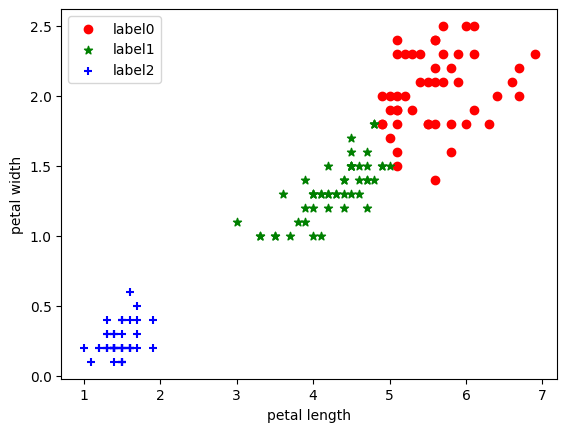

In [12]:
# kmeans预测结果
label_pred = kmeans.labels_
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]

plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='label0')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='label1')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [13]:
print(y.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Y, dtype: int64


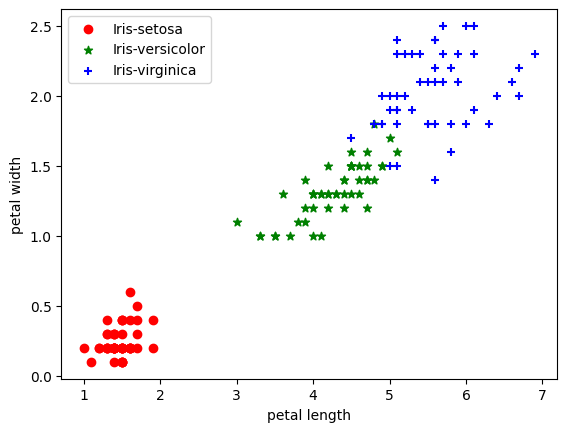

In [14]:
# 真实变迁结果
x0 = X[y == "Iris-setosa"]
x1 = X[y == "Iris-versicolor"]
x2 = X[y == "Iris-virginica"]

plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='Iris-setosa')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='Iris-versicolor')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='Iris-virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()